In [10]:
# шаардлагатай сангуудыг импортлох
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

In [11]:
# Өгөгдлийг унших
df = pd.read_csv("../data/processed/engineered_data.csv")

# Эхний 5 мөрийг харах
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


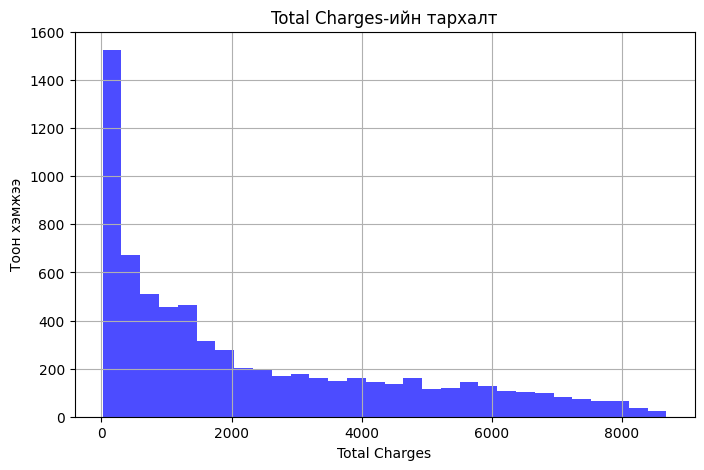

In [12]:
# Хувьсагчийн тархалт (Histogram)
plt.figure(figsize=(8,5))
plt.hist(df["TotalCharges"].dropna(), bins=30, color="blue", alpha=0.7)
plt.title("Total Charges-ийн тархалт")
plt.xlabel("Total Charges")
plt.ylabel("Тоон хэмжээ")
plt.grid(True)
plt.show()


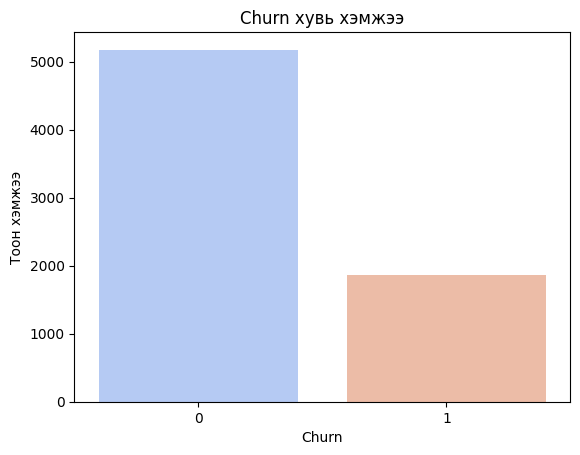

In [13]:
# Churn хувь хэмжээ (Bar chart)
sns.countplot(x="Churn", hue="Churn", data=df, palette="coolwarm", legend=False)
plt.title("Churn хувь хэмжээ")
plt.xlabel("Churn")
plt.ylabel("Тоон хэмжээ")
plt.show()


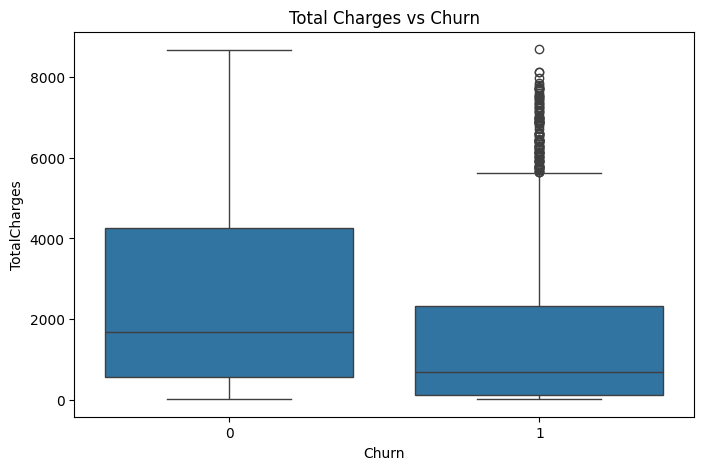

In [14]:
# Total Charges vs Churn (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()


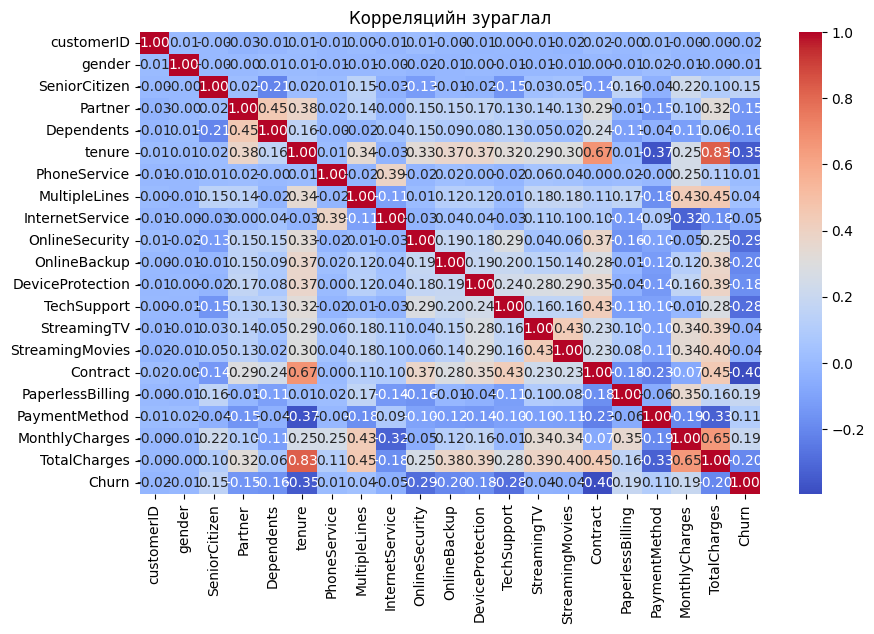

In [15]:
# Онцлог шинжүүдийн хамаарал (Correlation heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляцийн зураглал")
plt.show()


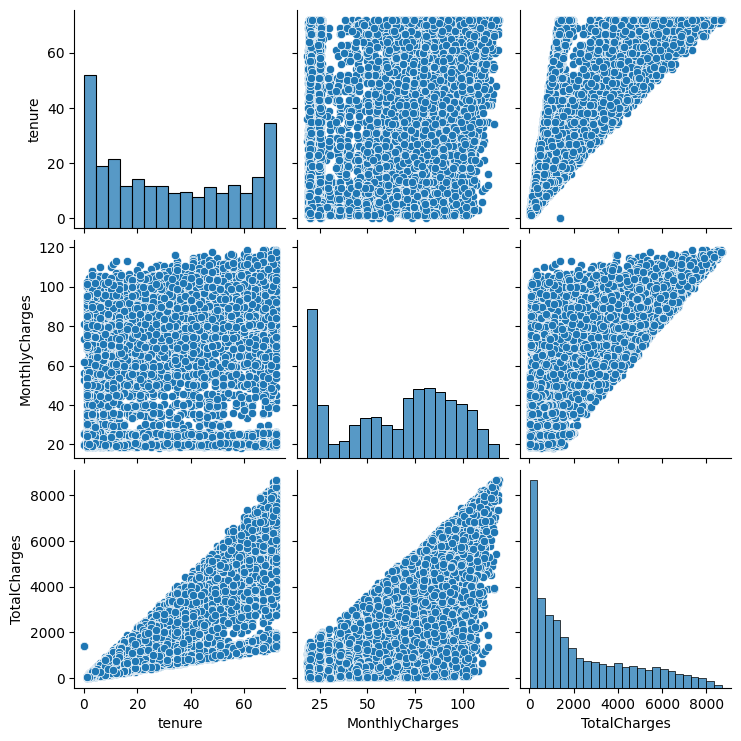

In [16]:
# Хос хувьсагчийн тархалт (Pairplot)
sns.pairplot(df[["tenure", "MonthlyCharges", "TotalCharges"]].dropna())
plt.show()


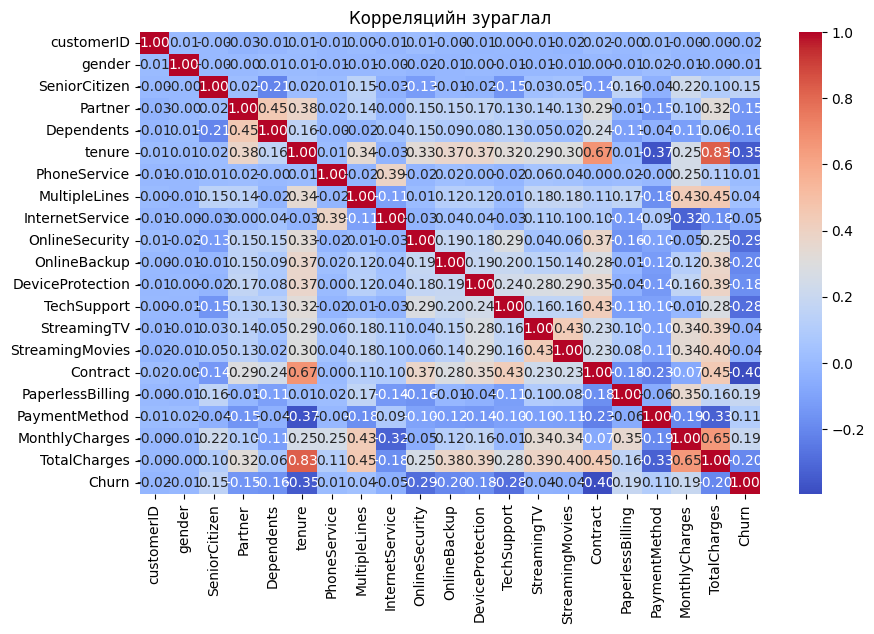

In [17]:
# Корреляцийн зураглал (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляцийн зураглал")
plt.show()

In [20]:
import os

# 📂 Хэрэв хавтас байхгүй бол үүсгэх
os.makedirs("reports/figures", exist_ok=True)

import plotly.express as px

fig = px.pie(df, names="Churn", title="Churn хувь хэмжээ", hole=0.4)
fig.write_image("../reports/figures/churn_pie_chart.png")  # ✅ Одоо файл амжилттай хадгалагдана

